In [1]:
#LSTM Long Short Term Memory


In [5]:
import numpy as np
from tensorflow.keras.datasets import imdb
(x_tr,y_tr),(x_ta,y_ta) = imdb.load_data(num_words=500)
x_tr.shape,y_tr.shape,x_ta.shape,y_ta.shape

from sklearn.model_selection import train_test_split
x_train,x_target,y_train,y_target = train_test_split(x_tr, y_tr, test_size=0.2, random_state=42)
x_train.shape, y_train.shape

# pad_sequences() 시퀀스 데이터의 길이를 맞춤
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 최대 단어의(토큰) 개수... 문장의 길이가..... 
x_train_seq = pad_sequences(x_train, maxlen=100)
x_target_seq = pad_sequences(x_target, maxlen=100)


In [10]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))  # 500:빈도수가 높은 단어의 개수 , 16:임베딩 벡터의 크기, 100:토큰의 개수 8:뉴런의 
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4) #0.0001
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train_seq, y_train, epochs=50, batch_size=64,
                    validation_data=(x_target_seq, y_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/50
313/313 [==============================] - 12s 30ms/step - loss: 0.6929 - accuracy: 0.5220 - val_loss: 0.6925 - val_accuracy: 0.5586
Epoch 2/50
313/313 [==============================] - 8s 27ms/step - loss: 0.6920 - accuracy: 0.5742 - val_loss: 0.6913 - val_accuracy: 0.6018
Epoch 3/50
313/313 [==============================] - 9s 28ms/step - loss: 0.6900 - accuracy: 0.6173 - val_loss: 0.6884 - val_accuracy: 0.6370
Epoch 4/50
313/313 [==============================] - 8s 25ms/step - loss: 0.6848 - accuracy: 0.6545 - val_loss: 0.6803 - val_accuracy: 0.6686
Epoch 5/50
313/313 [==============================] - 8s 25ms/step - loss: 0.6661 - accuracy: 0.6863 - val_loss: 0.6406 - val_accuracy: 0.6994
Epoch 6/50
313/313 [==============================] - 8s 25ms/step - loss: 0.6101 - accuracy: 0.7236 - val_loss: 0.5940 - val_accuracy: 0.7262
Epoch 7/50
313/313 [==============================] - 8s 26ms/step - loss: 0.5820 - accuracy: 0.7406 - val_loss: 0.5734 - val_accuracy: 0.746

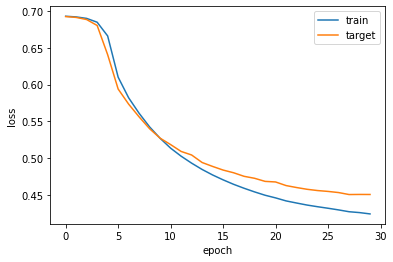

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','target'])
plt.show()

In [14]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))  # 500:빈도수가 높은 단어의 개수 , 16:임베딩 벡터의 크기, 100:토큰의 개수 8:뉴런의 
model.add(keras.layers.LSTM(8, dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4) #0.0001
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-dropout-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train_seq, y_train, epochs=50, batch_size=64,
                    validation_data=(x_target_seq, y_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/50
313/313 [==============================] - 11s 30ms/step - loss: 0.6924 - accuracy: 0.5426 - val_loss: 0.6916 - val_accuracy: 0.5938
Epoch 2/50
313/313 [==============================] - 10s 30ms/step - loss: 0.6903 - accuracy: 0.6036 - val_loss: 0.6889 - val_accuracy: 0.6222
Epoch 3/50
313/313 [==============================] - 9s 28ms/step - loss: 0.6854 - accuracy: 0.6379 - val_loss: 0.6816 - val_accuracy: 0.6476
Epoch 4/50
313/313 [==============================] - 8s 27ms/step - loss: 0.6662 - accuracy: 0.6540 - val_loss: 0.6404 - val_accuracy: 0.6650
Epoch 5/50
313/313 [==============================] - 8s 26ms/step - loss: 0.6077 - accuracy: 0.7115 - val_loss: 0.5925 - val_accuracy: 0.7268
Epoch 6/50
313/313 [==============================] - 10s 30ms/step - loss: 0.5764 - accuracy: 0.7327 - val_loss: 0.5679 - val_accuracy: 0.7408
Epoch 7/50
313/313 [==============================] - 9s 27ms/step - loss: 0.5522 - accuracy: 0.7502 - val_loss: 0.5455 - val_accuracy: 0.7

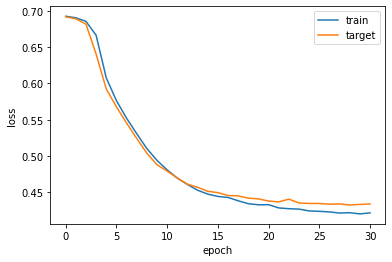

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','target'])
plt.show()

In [16]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))  # 500:빈도수가 높은 단어의 개수 , 16:임베딩 벡터의 크기, 100:토큰의 개수 8:뉴런의 
model.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # 모든 타임스텝의 은닉상태를 출력          # 은닉층
model.add(keras.layers.LSTM(8, dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4) #0.0001
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-dropout2-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train_seq, y_train, epochs=50, batch_size=64,
                    validation_data=(x_target_seq, y_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/50
313/313 [==============================] - 22s 57ms/step - loss: 0.6928 - accuracy: 0.5275 - val_loss: 0.6924 - val_accuracy: 0.5002
Epoch 2/50
313/313 [==============================] - 17s 53ms/step - loss: 0.6905 - accuracy: 0.5471 - val_loss: 0.6875 - val_accuracy: 0.5978
Epoch 3/50
313/313 [==============================] - 17s 53ms/step - loss: 0.6682 - accuracy: 0.6340 - val_loss: 0.6365 - val_accuracy: 0.6674
Epoch 4/50
313/313 [==============================] - 16s 51ms/step - loss: 0.6023 - accuracy: 0.7021 - val_loss: 0.5811 - val_accuracy: 0.7144
Epoch 5/50
313/313 [==============================] - 16s 50ms/step - loss: 0.5653 - accuracy: 0.7301 - val_loss: 0.5516 - val_accuracy: 0.7378
Epoch 6/50
313/313 [==============================] - 16s 52ms/step - loss: 0.5425 - accuracy: 0.7438 - val_loss: 0.5394 - val_accuracy: 0.7346
Epoch 7/50
313/313 [==============================] - 18s 56ms/step - loss: 0.5222 - accuracy: 0.7552 - val_loss: 0.5150 - val_accuracy:

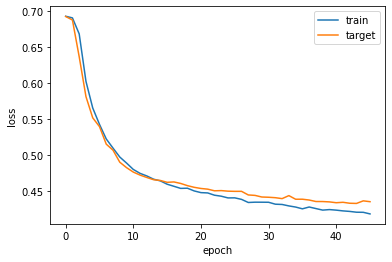

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','target'])
plt.show()

In [18]:
# GRU는 LSTM은 간소화한 버전이고 셀상태(출력,입력,삭제 게이트)를 계산하지 않고 은닉상태(업데이트게이트,리셋게이트) 하나만 포함, LSTM보다 가중치가 적기때문에 계산량이 적지만
# LSTM만큰 성능이 좋다
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))  # 500:빈도수가 높은 단어의 개수 , 16:임베딩 벡터의 크기, 100:토큰의 개수 8:뉴런의 
model.add(keras.layers.GRU(8))                   # 은닉층
model.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4) #0.0001
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train_seq, y_train, epochs=50, batch_size=64,
                    validation_data=(x_target_seq, y_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/50
313/313 [==============================] - 11s 30ms/step - loss: 0.6925 - accuracy: 0.5325 - val_loss: 0.6918 - val_accuracy: 0.5552
Epoch 2/50
313/313 [==============================] - 10s 31ms/step - loss: 0.6907 - accuracy: 0.5733 - val_loss: 0.6899 - val_accuracy: 0.5770
Epoch 3/50
313/313 [==============================] - 10s 32ms/step - loss: 0.6879 - accuracy: 0.5962 - val_loss: 0.6868 - val_accuracy: 0.5954
Epoch 4/50
313/313 [==============================] - 10s 30ms/step - loss: 0.6834 - accuracy: 0.6109 - val_loss: 0.6818 - val_accuracy: 0.6040
Epoch 5/50
313/313 [==============================] - 8s 27ms/step - loss: 0.6767 - accuracy: 0.6199 - val_loss: 0.6746 - val_accuracy: 0.6116
Epoch 6/50
313/313 [==============================] - 9s 27ms/step - loss: 0.6665 - accuracy: 0.6316 - val_loss: 0.6634 - val_accuracy: 0.6206
Epoch 7/50
313/313 [==============================] - 9s 28ms/step - loss: 0.6519 - accuracy: 0.6462 - val_loss: 0.6474 - val_accuracy: 0.

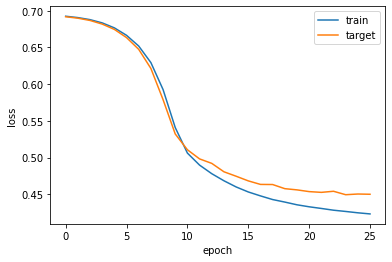

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','target'])
plt.show()